# Regression Analysis : Studi Kasus pada Healthcare Stroke Dataset

by **Muhammad Hilman Maulana** | last_update: July 2022

### Our Understanding

Stroke, kondisi medis akibat buruknya aliran darah menuju otak sehingga mengakibatkan terjadinya kematian sel [source](https://id.wikipedia.org/wiki/Strok#Deteksi_dini), merupakan salah satu penyakit fatal dan dapat menyebabkan kematian. Data World Stroke Organization (WSO) menunjukkan bahwa setiap tahunnya terdapat 13,7 juta kasus baru stroke dan sekitar 5,5 juta kematian terjadi akibat penyakit stroke [source](https://pusdatin.kemkes.go.id/). Pengobatan penyakit stroke dapat dilakukan melalui beberapa metode bergantung kepada tingkat keparahan dan kondisi fisik pasien, hingga saat ini, penelitian medis masih terbuka dilakukan demi meningkatkan angka harapan hidup pasien penderita penyakit kanker. 

Pendekatan matematika dapat dilakukan untuk melihat serta menganalisis apa saja faktor utama yang secara signifikan dapat memengaruhi seseorang terkena penyakit stroke. Dataset yang tersedia memuat berbagai informasi relevan terkait dengan kondisi fisik seseorang apakah mereka terkena penyakit stroke atau tidak. Melalui explanatory analysis, kita dapat menghitung nilai korelasi antara masing-masing variabel input dengan variabel output. 

Sederhananya, akan dilakukan analisis regeresi menggunakan Logistic Regression untuk mengetahui hubungan antara variabel independen dengan variabel biner dependen melalui pencarian model yang dapat mengaproksimasi variabel dependen. Lebih jauh, nilai 1 pada output/dependen variabel merepresentasikan pasien terkena penyakit stoke sedangkan nilai 0 sebaliknya (tidak terkena penyakit stroke).

### Data Source

Data yang digunakan dapat diakses melalui [Stroke Prediction Dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset) yang terdiri beberapa kolom seperti `'gender'`, `'age'`, `'work_type'`, `'bmi'`, `'smoking_status'`, `'avg_glucose_leve'`, dll. Deskripsi lengkap terkait masing-masing kolom pada dataset tersebut dirangkum sbb.
- id: unique identifier
- gender: "Male", "Female" atau "Other"
- age: usia pasien
- hypertension: 0 pasien tidak memiliki hipertensi, 1 pasien memiliki hipertensi
- heart_disease: 0 pasien tidak memiliki penyakit jantung, 1 pasien memiliki penyakit jantung
- ever_married: "No" or "Yes"
- work_type: "children", "Govt_jov", "Never_worked", "Private" atau "Self-employed"
- Residence_type: "Rural" or "Urban"
- avg_glucose_level: average glucose level in blood
- bmi: body mass index
- smoking_status: "formerly smoked", "never smoked", "smokes" atau "Unknown"*
- stroke: 1 terkena stroke, 0 tidak terkena stroke

### Reference

Hwang, Y. H. (2019). Hands-On Data Science for Marketing. Birmingham: Packt Publishing Ltd.

### Data Cleaning and Overview

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
data = pd.read_csv("Dataset/healthcare-dataset-stroke-data.csv")
data = data.drop(data[data.gender == "Other"].index)
pd.set_option("display.max_columns", None)

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.shape

(5109, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 518.9+ KB


In [6]:
data.duplicated().any()

False

In [7]:
data.isnull().sum()/data.shape[0]*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.934234
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [8]:
data.dropna(subset=["bmi"], inplace=True)

In [9]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
data.shape

(4908, 12)

#### Key Takeaways
- Data original terdiri dari 5109 baris dan 12 kolom.
- Tidak terdapat duplikat data.
- Terdapat 3.9% missing values dari kolom bmi.
- Setelah drop missing values kolom bmi, dimensi baru data menjadi (4908, 12).


In [11]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [12]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000
mean,37060.423594,42.868810,0.091891,0.049511,105.297402,28.89456,0.042584
std,20995.468407,22.556128,0.288901,0.216954,44.425550,7.85432,0.201937
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,18602.500000,25.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,37580.500000,44.000000,0.000000,0.000000,91.680000,28.10000,0.000000
75%,55181.750000,60.000000,0.000000,0.000000,113.495000,33.10000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


In [13]:
113.495000*1.5

170.2425

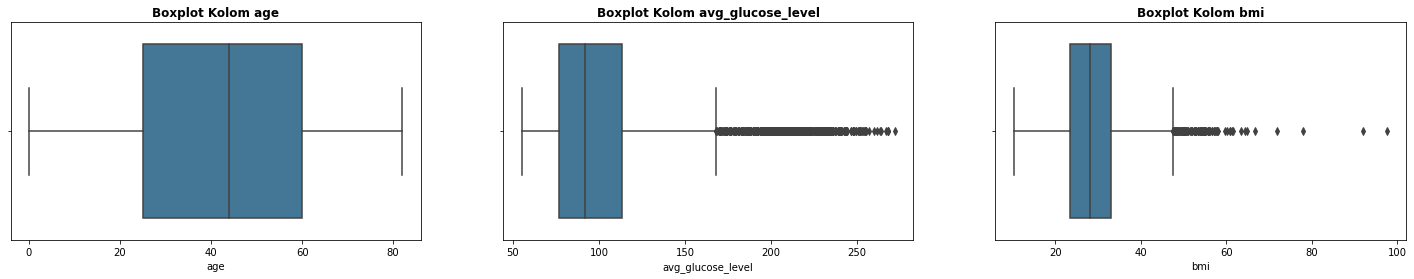

In [14]:
kolom = ["age","avg_glucose_level","bmi"]
plt.figure(figsize=(25,4))
j = 1
for i in kolom :
    plt.subplot(1,3,j)
    #plt.grid()
    sns.boxplot(data[i], palette="mako").set_title("Boxplot Kolom "+i,weight='bold')        
    j=j+1 

In [15]:
out_bmi = data[data["bmi"]>49]
out_gluc = data[data["avg_glucose_level"]>170.2425]

In [16]:
stroke_out_bmi =  pd.DataFrame(out_bmi.groupby('stroke')['id'].count() / out_bmi.shape[0] * 100.0)
stroke_out_bmi

,id
stroke,
0,98.888889
1,1.111111


In [17]:
stroke_out_gluc =  pd.DataFrame(out_gluc.groupby('stroke')['id'].count() / out_gluc.shape[0] * 100.0)
stroke_out_gluc

,id
stroke,
0,86.964286
1,13.035714


#### Key Takeaways
- Terdapat outliers pada kolom avg_glucose_level dan bmi.
- Untuk data-data outlier pada kolom bmi, sebesar 98.88% pasien tidak terkena penyakit stroke dan 1.11% lainnya terkena stroke. Hal ini memberikan hipotesis bahwa, data-data yang semakin besar dan dinyatakan sebagai outlier tidak begitu mempengaruhi seseorang terkena stroke atau tidak. Sedangkan untuk data outlier pd kolom avg_glucose_level, sebesar 86.96% pasien dinyakan terkena stroke dan 13.04% lainnya tidak. 
- Kemudian akan dilakukan segmentasi untuk kelompok umur dengan kriteria sebagai berikut
    - Baby:[0,3)
    - Young Adults [3,40)
    - Middle Adults [40,60)
    - Old Adults [60,100)
- Dari hasil visualisasi, proporsi paling banyak untuk kelompok usia yaitu Young Adults dengan persentase sebesar 39.61%.

In [18]:
def segment_age(x):
    segment = ''
    if x["age"] >= 0 and x["age"] < 3:
        segment = "Baby [0,3)"
    elif x["age"] >= 3 and x["age"] < 40:
        segment = "Young Adults [3,40)"
    elif x["age"] >= 40 and x["age"] < 60:
        segment = "Middle Adults [40,60)"
    elif x["age"] >= 60 and x["age"] < 100:
        segment = "Old Adults [60,100)"
    return segment

data["Segment_Age"] = data.apply(lambda x : segment_age(x), axis=1)

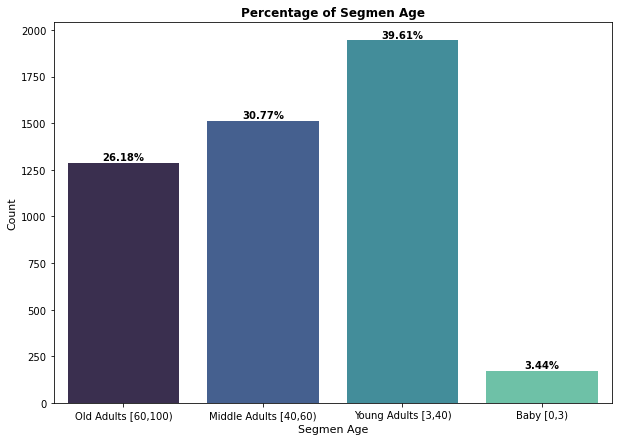

In [19]:
plt.figure(figsize=(10,7)) 
plt.title("Percentage of Segmen Age", fontsize = 12,fontweight="bold")
ax=sns.countplot(data["Segment_Age"], palette="mako")
plt.xlabel("Segmen Age", fontsize = 11)
plt.ylabel("Count", fontsize = 11)
total=len(data)
for p in ax.patches:
        ax.annotate(f'{100 * p.get_height() / total:.2f}%\n', (p.get_x() + p.get_width() / 2,p.get_height()),ha='center', va='center',weight='bold')

In [20]:
data_baby=data.query("Segment_Age == 'Baby [0,3)'")
data_baby

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Segment_Age
363,7559,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0,"Baby [0,3)"
376,22706,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown,0,"Baby [0,3)"
437,5010,Female,2.00,0,0,No,children,Rural,92.48,18.0,Unknown,0,"Baby [0,3)"
562,45238,Female,1.80,0,0,No,children,Urban,58.26,16.5,Unknown,0,"Baby [0,3)"
564,61511,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0,"Baby [0,3)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4961,3720,Female,2.00,0,0,No,children,Rural,80.30,21.2,Unknown,0,"Baby [0,3)"
5032,67426,Female,1.24,0,0,No,children,Rural,61.94,20.3,Unknown,0,"Baby [0,3)"
5079,42709,Male,1.72,0,0,No,children,Urban,77.28,17.1,Unknown,0,"Baby [0,3)"
5089,56714,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0,"Baby [0,3)"


### Data Analysis

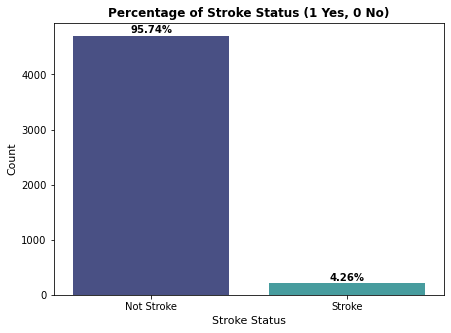

In [21]:
plt.figure(figsize=(7,5)) 
plt.title("Percentage of Stroke Status (1 Yes, 0 No)", fontsize = 12,fontweight="bold")
ax=sns.countplot(data["stroke"], palette="mako")
plt.xlabel("Stroke Status", fontsize = 11)
plt.ylabel("Count", fontsize = 11)
plt.xticks(ticks=[0, 1], labels=['Not Stroke', 'Stroke'])
total=len(data)
for p in ax.patches:
        ax.annotate(f'{100 * p.get_height() / total:.2f}%\n', (p.get_x() + p.get_width() / 2,p.get_height()),ha='center', va='center',weight='bold')

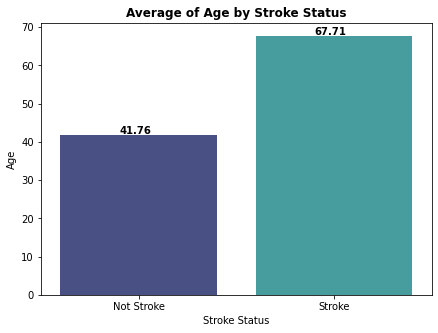

In [22]:
plt.figure(figsize=(7,5)) 
plt.title("Average of Age by Stroke Status", fontsize = 12,fontweight="bold")
ax=sns.barplot(data=data, x=data["stroke"], y="age",palette="mako",ci=None)
plt.xlabel("Stroke Status", fontsize = 10)
plt.ylabel("Age", fontsize = 10)
plt.xticks(ticks=[0, 1], labels=['Not Stroke', 'Stroke']);
for p in ax.patches:
        ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.4),weight='bold')

In [23]:
stroke_by_gender = pd.pivot_table(data, values='id', index='gender', columns='stroke', aggfunc=len).fillna(0.0)
stroke_by_gender.columns = ['Not Stroke', 'Stroke']

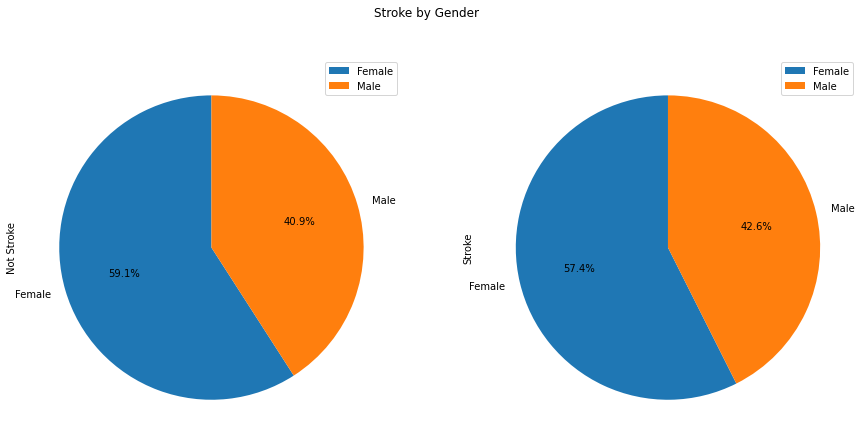

In [24]:
stroke_by_gender.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x,
    title='Stroke by Gender'
)

plt.show()

In [25]:
stroke_by_work_type = pd.pivot_table(data, values='id', index='work_type', columns='stroke', aggfunc=len).fillna(0.0)
stroke_by_work_type.columns = ['Not Stroke', 'Stroke']

In [26]:
stroke_by_work_type

,Not Stroke,Stroke
work_type,,
Govt_job,602.0,28.0
Never_worked,22.0,0.0
Private,2683.0,127.0
Self-employed,722.0,53.0
children,670.0,1.0


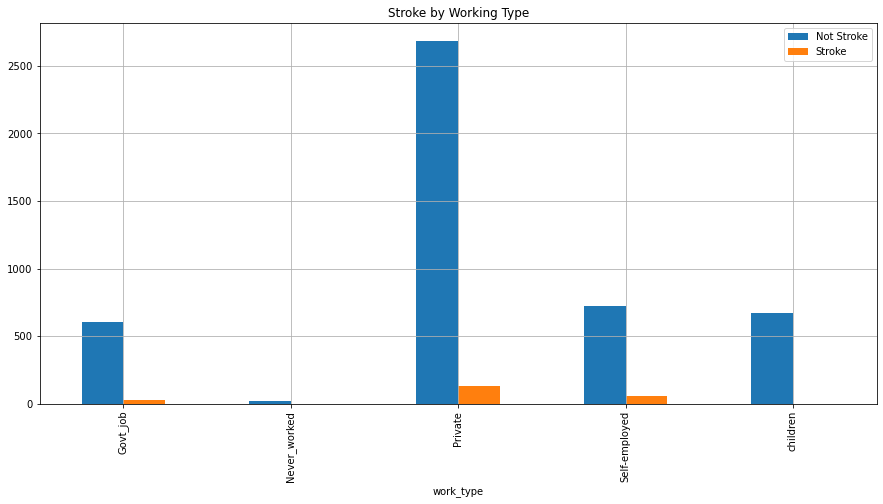

In [27]:
stroke_by_work_type.plot(
    kind='bar',
    figsize=(15, 7),
    title='Stroke by Working Type',
    grid=True,
)

plt.show()

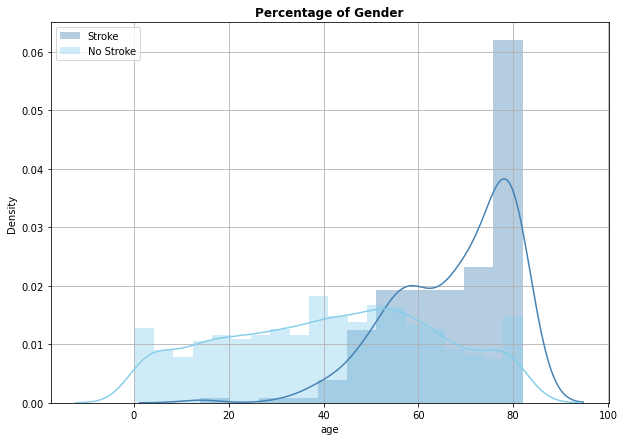

In [29]:
sns.set_palette("Blues")
plt.figure(figsize=(10,7))
ax = sns.distplot(data[data["stroke"]==1]["age"], label="Stroke",color='steelblue')
ax = sns.distplot(data[data["stroke"]==0]["age"], label= "No Stroke",color='skyblue')
ax.set_title('Percentage of Gender',fontweight="bold")
plt.grid()
plt.legend()

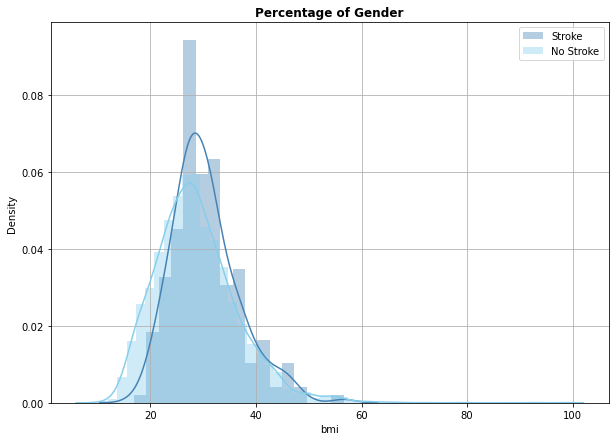

In [30]:
plt.figure(figsize=(10,7))
ax = sns.distplot(data[data["stroke"]==1]["bmi"], label="Stroke", color='steelblue')
ax = sns.distplot(data[data["stroke"]==0]["bmi"], label= "No Stroke",color='skyblue')
ax.set_title('Percentage of Gender',fontweight="bold")
plt.grid()
plt.legend()

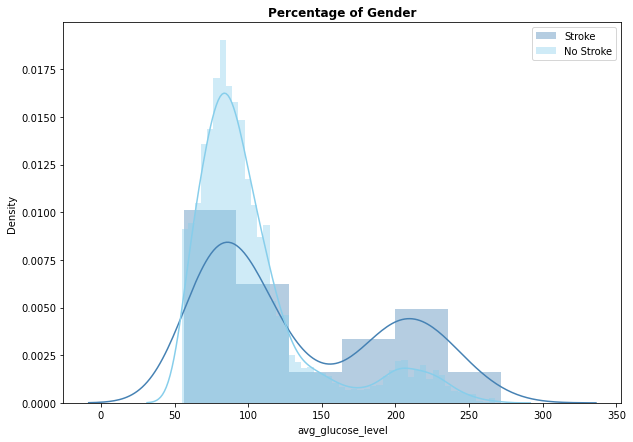

In [31]:
plt.figure(figsize=(10,7))
ax = sns.distplot(data[data["stroke"]==1]["avg_glucose_level"], label="Stroke",color='steelblue')
ax = sns.distplot(data[data["stroke"]==0]["avg_glucose_level"], label= "No Stroke", color="skyblue")
ax.set_title('Percentage of Gender',fontweight="bold")
#plt.grid()
plt.legend()

### Data Preparations

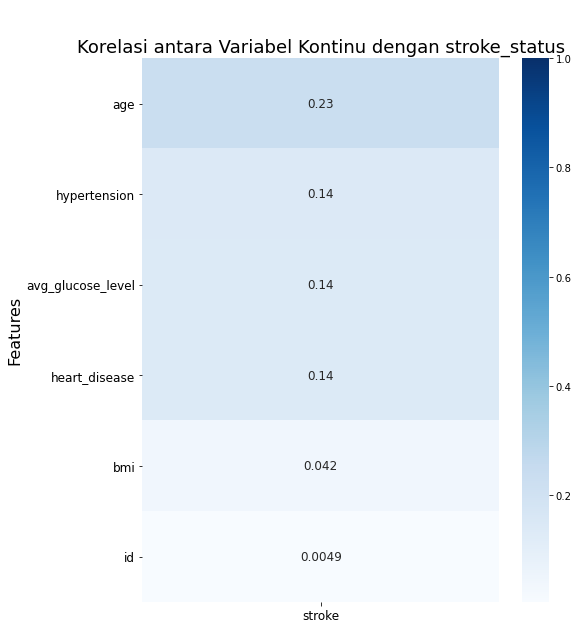

In [50]:
fig = plt.figure(figsize=(8,10))
ax = sns.heatmap(data.corr()[['stroke']].sort_values('stroke', ascending=False), annot = True, annot_kws = {"size":12}, cmap='Blues')
ax.set_title('Korelasi antara Variabel Kontinu dengan stroke_status', fontsize=18)
ax.set_ylabel('Features', fontsize = 16)
ax.tick_params(axis = "both", labelsize = 12);
y_min, y_max = ax.get_ylim()
ax.set_ylim(top=y_max+1);

In [51]:
continuous_vars = ["age","hypertension","heart_disease","avg_glucose_level","bmi"]
data[continuous_vars]

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.6
2,80.0,0,1,105.92,32.5
3,49.0,0,0,171.23,34.4
4,79.0,1,0,174.12,24.0
5,81.0,0,0,186.21,29.0
...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6
5106,81.0,0,0,125.20,40.0
5107,35.0,0,0,82.99,30.6
5108,51.0,0,0,166.29,25.6


In [52]:
categ_vars = ["gender","ever_married","work_type","Residence_type","smoking_status"]
data[categ_vars]

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
5,Male,Yes,Private,Urban,formerly smoked
...,...,...,...,...,...
5104,Female,No,children,Rural,Unknown
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


### Regression Analysis with Continuous Variables Only

In [53]:
import statsmodels.api as sm

In [54]:
logit = sm.Logit(
    data['stroke'], 
    data[continuous_vars]
)

In [55]:
logit_fit = logit.fit()

Optimization terminated successfully.
         Current function value: 0.172056
         Iterations 8


In [56]:
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 4908
Model:                          Logit   Df Residuals:                     4903
Method:                           MLE   Df Model:                            4
Date:                Tue, 26 Jul 2022   Pseudo R-squ.:                 0.02279
Time:                        02:31:44   Log-Likelihood:                -844.45
converged:                       True   LL-Null:                       -864.15
Covariance Type:            nonrobust   LLR p-value:                 5.770e-08
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                   0.0338      0.003     10.258      0.000       0.027       0.040
hypertension          1.0699      0.180      5.958      0.000       0.718       1.422
heart_disease         0.8492      0.210      4.039      0.000       0.437       1.261
avg_glucose_level     0.0002      0.001      0.172      0.864      -0.003       0.003
bmi                  -0.1803      0.009    -20.590      0.000      -0.197      -0.163
=====================================================================================
"""

### Interpretation

Berdasarkan hasil summary yang diperoleh, perhatikan bahwa, nilai p-value untuk kolom age, hypertention, heart_disease, dan bmi sangatlah keci, maka terdapat hubungan yang signifikan antara variabel-variabel tersebut dengan stroke_status. 

Variabel age, hypertension, heart_disease, dan avg_glucose_level memiliki hubungan korelasi positif dengan output variabel (stroke_status). Sedangkan variabel bmi, terdapat hubungan korelasi yang negatif. 

1. Semakin tinggi usia seseorang, maka kecenderungan orang tersebut terkena stroke akan semakin tinggi.
2. Jika seseorang mengidap penyakit hipertensi, maka kecenderungan orang tsb akan terkena stroke semakin besar.
3. Jika seseorang mengidap penyakit jantung, maka kecenderungan orang tsb terkena stroke semakin besar.
4. Untuk variabel bmi, terdapat korelasi negatif dengan stroke_status. Artinya semakin tinggi nilai bmi maka kecenderungan orang tersebut terkena penyakit stroke semain rendah.